<a href="https://colab.research.google.com/github/SafeKepper/SafeKepper.github.io/blob/main/Data_computational_drug_Bioactivity_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection and Preprocessing

In [1]:
! pip install chembl_webresource_client


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
targets = new_client.target
target_query = targets.search('Human DiHydroOrotate DeHydrogenase')
nam = 'Human DiHydroOrotate DeHydrogenase'
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q02127', 'xref_name': None, 'xre...",Homo sapiens,Dihydroorotate dehydrogenase,26.0,False,CHEMBL1966,"[{'accession': 'Q02127', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'O35435', 'xref_name': None, 'xre...",Mus musculus,Dihydroorotate dehydrogenase,26.0,False,CHEMBL2991,"[{'accession': 'O35435', 'component_descriptio...",SINGLE PROTEIN,10090
2,"[{'xref_id': 'Q63707', 'xref_name': None, 'xre...",Rattus norvegicus,Dihydroorotate dehydrogenase,26.0,False,CHEMBL2383,"[{'accession': 'Q63707', 'component_descriptio...",SINGLE PROTEIN,10116
3,[],Plasmodium falciparum (isolate 3D7),"Dihydroorotate dehydrogenase (quinone), mitoch...",26.0,False,CHEMBL3588732,"[{'accession': 'Q08210', 'component_descriptio...",SINGLE PROTEIN,36329
4,[],Leishmania major,Dihydroorotate dehydrogenase (fumarate),26.0,False,CHEMBL4295843,"[{'accession': 'Q4QEW7', 'component_descriptio...",SINGLE PROTEIN,5664
...,...,...,...,...,...,...,...,...,...
367,[],Mus musculus,Mitogen-activated protein kinase kinase kinase 20,5.0,False,CHEMBL4523452,"[{'accession': 'Q9ESL4', 'component_descriptio...",SINGLE PROTEIN,10090
368,[],Mycobacterium smegmatis (strain ATCC 700084 / ...,FAD-dependent decaprenylphosphoryl-beta-D-ribo...,4.0,False,CHEMBL3797019,"[{'accession': 'A0R607', 'component_descriptio...",SINGLE PROTEIN,246196
369,[],Mycobacterium tuberculosis (strain ATCC 25618 ...,FAD-dependent decaprenylphosphoryl-beta-D-ribo...,4.0,False,CHEMBL3804751,"[{'accession': 'P9WJF1', 'component_descriptio...",SINGLE PROTEIN,83332
370,[],Mycobacterium tuberculosis (strain ATCC 25618 ...,"dTDP-4-dehydrorhamnose 3,5-epimerase /dTDP-4-d...",4.0,False,CHEMBL3883301,"[{'accession': 'P9WH09', 'component_descriptio...",PROTEIN FAMILY,83332


In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1966'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [6]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,105032,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '18.97', 'le': '0.37', 'lle': '2.72', ...",CHEMBL154151,None,CHEMBL154151,7.30,False,http://www.openphacts.org/units/Nanomolar,301996,=,1,True,=,None,IC50,nM,None,50.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,50.0
1,None,105033,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '13.23', 'le': '0.26', 'lle': '0.31', ...",CHEMBL157004,None,CHEMBL157004,6.08,False,http://www.openphacts.org/units/Nanomolar,302017,=,1,True,=,None,IC50,nM,None,840.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,840.0
2,None,106191,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '20.78', 'le': '0.38', 'lle': '2.53', ...",CHEMBL348270,None,CHEMBL348270,6.39,True,http://www.openphacts.org/units/Nanomolar,301993,=,1,True,=,None,IC50,nM,None,410.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,410.0
3,None,107373,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '18.08', 'le': '0.36', 'lle': '2.29', ...",CHEMBL345464,None,CHEMBL345464,7.70,False,http://www.openphacts.org/units/Nanomolar,302008,=,1,True,=,None,IC50,nM,None,20.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,20.0
4,None,108397,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '12.81', 'le': '0.25', 'lle': '0.35', ...",CHEMBL154214,None,CHEMBL154214,5.24,False,http://www.openphacts.org/units/Nanomolar,302022,=,1,True,=,None,IC50,nM,None,5700.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,5700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,None,20661786,[],CHEMBL4618428,Inhibition of human DHODH using dihydroorotate...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,None,None,CHEMBL4616673,J Med Chem,2020,None,CHEMBL4648036,None,CHEMBL4648036,None,False,http://www.openphacts.org/units/Nanomolar,3478917,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1459,Active,20717417,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4511629,Activity 

In [7]:
df.to_csv(nam + '_01_bioactivity_data_raw.csv', index=False)

In [8]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,105032,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '18.97', 'le': '0.37', 'lle': '2.72', ...",CHEMBL154151,None,CHEMBL154151,7.30,False,http://www.openphacts.org/units/Nanomolar,301996,=,1,True,=,None,IC50,nM,None,50.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,50.0
1,None,105033,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '13.23', 'le': '0.26', 'lle': '0.31', ...",CHEMBL157004,None,CHEMBL157004,6.08,False,http://www.openphacts.org/units/Nanomolar,302017,=,1,True,=,None,IC50,nM,None,840.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,840.0
2,None,106191,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '20.78', 'le': '0.38', 'lle': '2.53', ...",CHEMBL348270,None,CHEMBL348270,6.39,True,http://www.openphacts.org/units/Nanomolar,301993,=,1,True,=,None,IC50,nM,None,410.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,410.0
3,None,107373,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '18.08', 'le': '0.36', 'lle': '2.29', ...",CHEMBL345464,None,CHEMBL345464,7.70,False,http://www.openphacts.org/units/Nanomolar,302008,=,1,True,=,None,IC50,nM,None,20.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,20.0
4,None,108397,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '12.81', 'le': '0.25', 'lle': '0.35', ...",CHEMBL154214,None,CHEMBL154214,5.24,False,http://www.openphacts.org/units/Nanomolar,302022,=,1,True,=,None,IC50,nM,None,5700.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,5700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,None,20661786,[],CHEMBL4618428,Inhibition of human DHODH using dihydroorotate...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,None,None,CHEMBL4616673,J Med Chem,2020,None,CHEMBL4648036,None,CHEMBL4648036,None,False,http://www.openphacts.org/units/Nanomolar,3478917,>,1,True,>,None,IC50,nM,None,1000.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1459,Active,20717417,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4511629,Activity 

In [9]:
len(df2.canonical_smiles.unique())

1152

In [10]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,105032,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '18.97', 'le': '0.37', 'lle': '2.72', ...",CHEMBL154151,None,CHEMBL154151,7.30,False,http://www.openphacts.org/units/Nanomolar,301996,=,1,True,=,None,IC50,nM,None,50.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,50.0
1,None,105033,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '13.23', 'le': '0.26', 'lle': '0.31', ...",CHEMBL157004,None,CHEMBL157004,6.08,False,http://www.openphacts.org/units/Nanomolar,302017,=,1,True,=,None,IC50,nM,None,840.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,840.0
2,None,106191,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '20.78', 'le': '0.38', 'lle': '2.53', ...",CHEMBL348270,None,CHEMBL348270,6.39,True,http://www.openphacts.org/units/Nanomolar,301993,=,1,True,=,None,IC50,nM,None,410.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,410.0
3,None,107373,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '18.08', 'le': '0.36', 'lle': '2.29', ...",CHEMBL345464,None,CHEMBL345464,7.70,False,http://www.openphacts.org/units/Nanomolar,302008,=,1,True,=,None,IC50,nM,None,20.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,20.0
4,None,108397,[],CHEMBL665412,In vitro inhibitory activity against human dih...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,None,None,CHEMBL1146710,Bioorg. Med. Chem. Lett.,2004,"{'bei': '12.81', 'le': '0.25', 'lle': '0.35', ...",CHEMBL154214,None,CHEMBL154214,5.24,False,http://www.openphacts.org/units/Nanomolar,302022,=,1,True,=,None,IC50,nM,None,5700.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,5700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,20661783,[],CHEMBL4618428,Inhibition of human DHODH using dihydroorotate...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,None,None,CHEMBL4616673,J Med Chem,2020,"{'bei': '16.31', 'le': '0.31', 'lle': '1.53', ...",CHEMBL4640504,None,CHEMBL4640504,6.28,False,http://www.openphacts.org/units/Nanomolar,3478914,=,1,True,=,None,IC50,nM,None,520.0,CHEMBL1966,Homo sapiens,Dihydroorotate dehydrogenase,9606,None,None,IC50,nM,UO_0000065,None,520.0
1456,None,20661784,[],CHEMBL4618428,Inhibitio

In [11]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL154151,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,50.0
1,CHEMBL157004,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,840.0
2,CHEMBL348270,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,410.0
3,CHEMBL345464,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,20.0
4,CHEMBL154214,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,5700.0
...,...,...,...
1455,CHEMBL4640504,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,520.0
1456,CHEMBL4639751,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...,5.1
1457,CHEMBL4644261,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1,1000.0
1458,CHEMBL4648036,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,1000.0


In [12]:
df3.to_csv(nam + '_02_bioactivity_data_preprocessed.csv', index=False)

In [13]:
df4 = pd.read_csv(nam + '_02_bioactivity_data_preprocessed.csv')

In [14]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append('Inactive')
  elif float(i) <= 1000:
    bioactivity_threshold.append('active')
  else:
    bioactivity_threshold.append('Intermediate')

In [15]:
bioactivity_class = pd.Series(bioactivity_threshold, name="class")
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL154151,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,50.0,active
1,CHEMBL157004,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,840.0,active
2,CHEMBL348270,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,410.0,active
3,CHEMBL345464,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,20.0,active
4,CHEMBL154214,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,5700.0,Intermediate
...,...,...,...,...
1147,CHEMBL4640504,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,520.0,active
1148,CHEMBL4639751,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...,5.1,active
1149,CHEMBL4644261,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1,1000.0,active
1150,CHEMBL4648036,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,1000.0,active


In [16]:
df5.to_csv(nam + '_03_bioactivity_data_curated.csv', index=False)

In [17]:
! zip NS3.zip *.csv

  adding: Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv (deflated 93%)
  adding: Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv (deflated 83%)


In [18]:
! ls -l

total 1140
-rw-r--r-- 1 root root 900626 Jan 30 12:10 'Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root  76692 Jan 30 12:10 'Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root  86913 Jan 30 12:10 'Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root  92463 Jan 30 12:10  NS3.zip
drwxr-xr-x 1 root root   4096 Jan  7 14:33  sample_data


# Exploratory Data Analysis

In [19]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-01-30 12:10:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   196MB/s    in 0.4s    

2022-01-30 12:10:01 (196 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv(nam + '_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL154151,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,50.0,active
1,CHEMBL157004,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,840.0,active
2,CHEMBL348270,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,410.0,active
3,CHEMBL345464,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,20.0,active
4,CHEMBL154214,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,5700.0,Intermediate
...,...,...,...,...
1147,CHEMBL4640504,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,520.0,active
1148,CHEMBL4639751,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...,5.1,active
1149,CHEMBL4644261,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1,1000.0,active
1150,CHEMBL4648036,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,1000.0,active


In [22]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [23]:
smiles = []
for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [24]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL154151,50.0,active,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...
1,CHEMBL157004,840.0,active,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...
2,CHEMBL348270,410.0,active,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1
3,CHEMBL345464,20.0,active,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...
4,CHEMBL154214,5700.0,Intermediate,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...
...,...,...,...,...
1147,CHEMBL4640504,520.0,active,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...
1148,CHEMBL4639751,5.1,active,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...
1149,CHEMBL4644261,1000.0,active,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1
1150,CHEMBL4648036,1000.0,active,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F


Calculate Lipinski Descriptors

In [25]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [26]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [27]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,384.863,4.57660,2.0,3.0
1,459.342,5.77460,2.0,3.0
2,307.349,3.85720,2.0,2.0
3,425.790,5.40920,2.0,3.0
4,409.335,4.89490,2.0,3.0
...,...,...,...,...
1147,385.389,4.75270,0.0,4.0
1148,409.367,3.82840,2.0,5.0
1149,379.341,4.58260,0.0,4.0
1150,351.331,5.01860,0.0,3.0


In [28]:
df_combined = pd.concat([df,df_lipinski],axis=1)

In [29]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL154151,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,50.0,active,384.863,4.57660,2.0,3.0
1,CHEMBL157004,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,840.0,active,459.342,5.77460,2.0,3.0
2,CHEMBL348270,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,410.0,active,307.349,3.85720,2.0,2.0
3,CHEMBL345464,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,20.0,active,425.790,5.40920,2.0,3.0
4,CHEMBL154214,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,5700.0,Intermediate,409.335,4.89490,2.0,3.0
...,...,...,...,...,...,...,...,...
1147,CHEMBL4640504,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,520.0,active,385.389,4.75270,0.0,4.0
1148,CHEMBL4639751,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...,5.1,active,409.367,3.82840,2.0,5.0
1149,CHEMBL4644261,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1,1000.0,active,379.341,4.58260,0.0,4.0
1150,CHEMBL4648036,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,1000.0,active,351.331,5.01860,0.0,3.0


Convert IC50 to pIC50

In [30]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [31]:
df_combined.standard_value.describe()

count      1152.000000
mean      32223.697218
std       63489.681368
min           0.500000
25%         116.750000
50%        1815.000000
75%       42250.000000
max      524400.000000
Name: standard_value, dtype: float64

In [32]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [33]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL154151,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,active,384.863,4.57660,2.0,3.0,50.0
1,CHEMBL157004,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,active,459.342,5.77460,2.0,3.0,840.0
2,CHEMBL348270,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,active,307.349,3.85720,2.0,2.0,410.0
3,CHEMBL345464,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,active,425.790,5.40920,2.0,3.0,20.0
4,CHEMBL154214,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,Intermediate,409.335,4.89490,2.0,3.0,5700.0
...,...,...,...,...,...,...,...,...
1147,CHEMBL4640504,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,active,385.389,4.75270,0.0,4.0,520.0
1148,CHEMBL4639751,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...,active,409.367,3.82840,2.0,5.0,5.1
1149,CHEMBL4644261,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1,active,379.341,4.58260,0.0,4.0,1000.0
1150,CHEMBL4648036,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,active,351.331,5.01860,0.0,3.0,1000.0


In [34]:
df_norm.standard_value_norm.describe()

count      1152.000000
mean      32223.697218
std       63489.681368
min           0.500000
25%         116.750000
50%        1815.000000
75%       42250.000000
max      524400.000000
Name: standard_value_norm, dtype: float64

In [35]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL154151,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,active,384.863,4.57660,2.0,3.0,7.301030
1,CHEMBL157004,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,active,459.342,5.77460,2.0,3.0,6.075721
2,CHEMBL348270,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,active,307.349,3.85720,2.0,2.0,6.387216
3,CHEMBL345464,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,active,425.790,5.40920,2.0,3.0,7.698970
4,CHEMBL154214,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,Intermediate,409.335,4.89490,2.0,3.0,5.244125
...,...,...,...,...,...,...,...,...
1147,CHEMBL4640504,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,active,385.389,4.75270,0.0,4.0,6.283997
1148,CHEMBL4639751,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...,active,409.367,3.82840,2.0,5.0,8.292430
1149,CHEMBL4644261,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1,active,379.341,4.58260,0.0,4.0,6.000000
1150,CHEMBL4648036,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,active,351.331,5.01860,0.0,3.0,6.000000


In [36]:
df_final.pIC50.describe()

count    1152.000000
mean        5.765427
std         1.425245
min         3.280337
25%         4.374196
50%         5.741138
75%         6.932746
max         9.301030
Name: pIC50, dtype: float64

In [37]:
df_final.to_csv(nam+'_04_bioactivity_data_3class_pIC50.csv')

In [38]:
df_2class = df_final[df_final['class'] != 'Intermediate'] #imp
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL154151,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,active,384.863,4.57660,2.0,3.0,7.301030
1,CHEMBL157004,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,active,459.342,5.77460,2.0,3.0,6.075721
2,CHEMBL348270,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,active,307.349,3.85720,2.0,2.0,6.387216
3,CHEMBL345464,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,active,425.790,5.40920,2.0,3.0,7.698970
5,CHEMBL157105,O=C(O)C1=C(C(=O)Nc2c(F)cc(-c3cccc(OC(F)(F)F)c3...,active,427.325,5.03400,2.0,3.0,7.481486
...,...,...,...,...,...,...,...,...
1147,CHEMBL4640504,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,active,385.389,4.75270,0.0,4.0,6.283997
1148,CHEMBL4639751,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...,active,409.367,3.82840,2.0,5.0,8.292430
1149,CHEMBL4644261,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1,active,379.341,4.58260,0.0,4.0,6.000000
1150,CHEMBL4648036,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,active,351.331,5.01860,0.0,3.0,6.000000


In [39]:
df_2class.to_csv( nam +'_05_bioactivity_data_2class_pIC50.csv')

Lipinki Descriptors

In [40]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

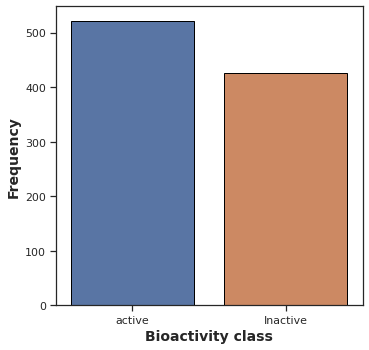

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

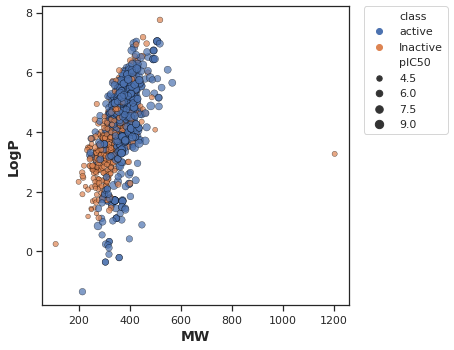

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

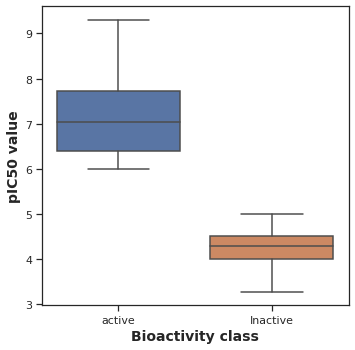

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [44]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [45]:
mannwhitney('pIC50')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


MW


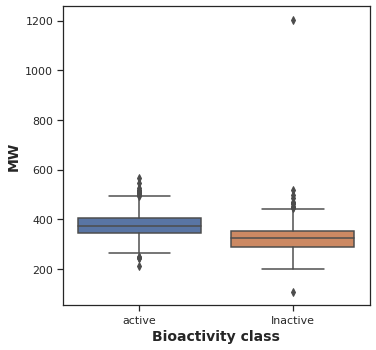

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [47]:
mannwhitney('MW')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,0.0,0.0,0.05,Different distribution (reject H0)


LogP

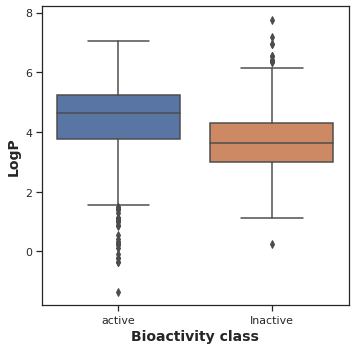

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [49]:
mannwhitney('LogP')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,0.0,0.0,0.05,Different distribution (reject H0)


NumHDonors


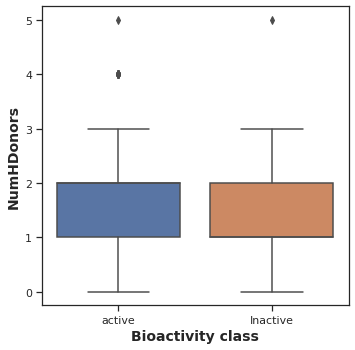

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [51]:
mannwhitney('NumHDonors')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.0,0.0,0.05,Different distribution (reject H0)


NumHAcceptors

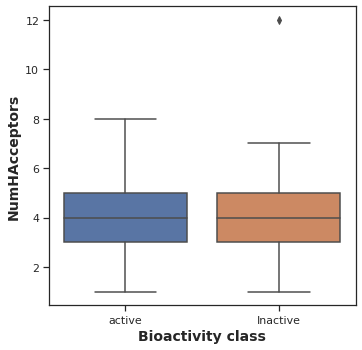

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [53]:
mannwhitney('NumHAcceptors')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,0.0,0.0,0.05,Different distribution (reject H0)


In [54]:
! zip -r results.zip . -i *.csv *.pdf

  adding: Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: mannwhitneyu_LogP.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 11%)
  adding: Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv (deflated 93%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: Human DiHydroOrotate DeHydrogenase_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv (deflated 83%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 13%)
  adding: Human DiHydroOrotate DeHydrogenase_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 13%)
  adding: mannwhitneyu_p

#Descriptor Calculation and Dataset Preparation

In [55]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-01-30 12:11:09--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-01-30 12:11:09--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   156MB/s    in 0.2s    

2022-01-30 12:11:09 (156 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-01-30 12:11:09--  https://github

In [56]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [57]:
import pandas as pd

In [58]:
df3 = pd.read_csv(nam + '_04_bioactivity_data_3class_pIC50.csv')

In [59]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL154151,CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...,active,384.863,4.57660,2.0,3.0,7.301030
1,1,CHEMBL157004,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...,active,459.342,5.77460,2.0,3.0,6.075721
2,2,CHEMBL348270,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1,active,307.349,3.85720,2.0,2.0,6.387216
3,3,CHEMBL345464,O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...,active,425.790,5.40920,2.0,3.0,7.698970
4,4,CHEMBL154214,O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...,Intermediate,409.335,4.89490,2.0,3.0,5.244125
...,...,...,...,...,...,...,...,...,...
1147,1147,CHEMBL4640504,CC(C)C1CC(=O)c2nnn(-c3cc(F)c(-c4ccccc4F)c(F)c3...,active,385.389,4.75270,0.0,4.0,6.283997
1148,1148,CHEMBL4639751,OC1c2ccccc2C(O)c2c1nnn2-c1cc(F)c(-c2ccccc2F)c(...,active,409.367,3.82840,2.0,5.0,8.292430
1149,1149,CHEMBL4644261,O=C(c1ccccc1)c1cn(-c2cc(F)c(-c3ccccc3F)c(F)c2)nn1,active,379.341,4.58260,0.0,4.0,6.000000
1150,1150,CHEMBL4648036,Fc1ccccc1-c1c(F)cc(-n2cc(-c3ccccc3)nn2)cc1F,active,351.331,5.01860,0.0,3.0,6.000000


In [60]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [61]:
! cat molecule.smi | head -5

CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl)cc1	CHEMBL154151
O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc2C(F)(F)F)CCC1	CHEMBL157004
O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1	CHEMBL348270
O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(Cl)c2)CCC1	CHEMBL345464
O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc2F)CCC1	CHEMBL154214


In [62]:
! cat molecule.smi | wc -l

1152


Calculate fingerprint descriptors

In [63]:
! bash padel.sh

Processing CHEMBL154151 in molecule.smi (1/1152). 
Processing CHEMBL157004 in molecule.smi (2/1152). 
Processing CHEMBL348270 in molecule.smi (3/1152). Average speed: 3.81 s/mol.
Processing CHEMBL345464 in molecule.smi (4/1152). Average speed: 1.99 s/mol.
Processing CHEMBL154214 in molecule.smi (5/1152). Average speed: 1.78 s/mol.
Processing CHEMBL157105 in molecule.smi (6/1152). Average speed: 1.37 s/mol.
Processing CHEMBL345701 in molecule.smi (7/1152). Average speed: 1.29 s/mol.
Processing CHEMBL358435 in molecule.smi (8/1152). Average speed: 1.16 s/mol.
Processing CHEMBL345652 in molecule.smi (9/1152). Average speed: 1.10 s/mol.
Processing CHEMBL345147 in molecule.smi (10/1152). Average speed: 1.01 s/mol.
Processing CHEMBL155597 in molecule.smi (11/1152). Average speed: 0.96 s/mol.
Processing CHEMBL154513 in molecule.smi (13/1152). Average speed: 0.86 s/mol.
Processing CHEMBL349577 in molecule.smi (12/1152). Average speed: 0.90 s/mol.
Processing CHEMBL157164 in molecule.smi (14/115

In [64]:
! ls -l

total 112392
-rw-r--r-- 1 root root  2059324 Jan 30 12:15  descriptors_output.csv
-rw-r--r-- 1 root root   900626 Jan 30 12:10 'Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root    76692 Jan 30 12:10 'Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root    86913 Jan 30 12:10 'Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root   149387 Jan 30 12:11 'Human DiHydroOrotate DeHydrogenase_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root   121233 Jan 30 12:11 'Human DiHydroOrotate DeHydrogenase_05_bioactivity_data_2class_pIC50.csv'
drwxr-xr-x 3 root root     4096 Jan 30 12:11  __MACOSX
-rw-r--r-- 1 root root      101 Jan 30 12:11  mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root       99 Jan 30 12:11  mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      110 Jan 30 12:11  mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      107 Jan 30 12:11  mannwhitneyu_NumHDonors.c

In [65]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop('Name',axis=1)

In [66]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df3_X)
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1148,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1149,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1150,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:

df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1148,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1149,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1150,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
df3_Y = df3['pIC50']
df3_Y

0       7.301030
1       6.075721
2       6.387216
3       7.698970
4       5.244125
          ...   
1147    6.283997
1148    8.292430
1149    6.000000
1150    6.000000
1151    8.920819
Name: pIC50, Length: 1152, dtype: float64

Combine x and y

In [69]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.301030
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.075721
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.387216
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.698970
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.244125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.283997
1148,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.292430
1149,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
1150,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000


In [70]:
dataset3.to_csv( nam + '_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# Regression Models with Random Forest

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [72]:
df = pd.read_csv(nam + '_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


In [73]:
X = df.drop('pIC50', axis=1)

X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1148,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1149,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1150,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
df.pIC50.to_csv(nam + "_Predicted_pIC50_values.csv", index=False)
Y = df.pIC50
Y

0       7.301030
1       6.075721
2       6.387216
3       7.698970
4       5.244125
          ...   
1147    6.283997
1148    8.292430
1149    6.000000
1150    6.000000
1151    8.920819
Name: pIC50, Length: 1152, dtype: float64

In [75]:
X.shape

(1152, 881)

In [76]:
Y.shape

(1152,)

In [77]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [78]:
X.shape

(1152, 160)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [80]:
X_train.shape, Y_train.shape

((921, 160), (921,))

In [81]:
X_test.shape, Y_test.shape

((231, 160), (231,))

In [82]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6212952769558124

In [83]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

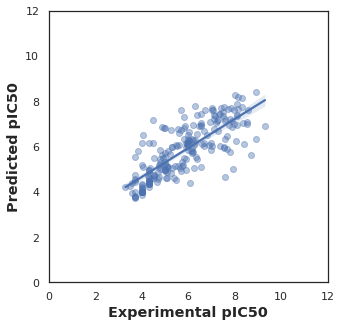

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show